In [3]:
import pandas as pd

In [4]:
import pandas as pd

In [9]:
path="C:/Users/SHIVANI/Desktop/PCOS Final year/PCOS_data1.csv"
data = pd.read_csv(path)

In [10]:
print(data)


     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)   BMI  Cycle(R/I)  \
0         1                 1           0          28  19.3           2   
1         2                 2           0          36  24.9           2   
2         3                 3           1          33  25.3           2   
3         4                 4           0          37  29.7           2   
4         5                 5           0          25  20.1           2   
..      ...               ...         ...         ...   ...         ...   
536     537               537           0          35  18.5           2   
537     538               538           0          30  25.3           2   
538     539               539           0          36  23.4           2   
539     540               540           0          27  22.2           4   
540     541               541           1          23  30.1           4   

     Cycle length(days)  FSH(mIU/mL)  FSH/LH AMH(ng/mL)  Weight gain(Y/N)  \
0                     

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [12]:
import warnings
warnings.filterwarnings('ignore')


In [13]:
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [14]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [15]:
data.shape


(541, 14)

In [16]:
data.head()

data.columns

data.sample(5)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),BMI,Cycle(R/I),Cycle length(days),FSH(mIU/mL),FSH/LH,AMH(ng/mL),Weight gain(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm)
302,303,303,0,26,27.3,4,3,5.14,0.63,18.7,0,3,4,16.0
524,525,525,1,27,24.0,2,5,4.30,2.11,0.19,1,9,10,21.0
189,190,190,1,23,22.9,4,4,3.26,1.49,5.69,1,7,9,16.0
316,317,317,0,30,28.6,2,5,3.40,2.60,2.23,1,8,4,16.0
147,148,148,0,28,28.1,2,5,8.96,11.95,2,0,3,3,17.0


In [18]:
data_dup=data.duplicated().any()
data_dup

False

In [19]:
data.isnull().sum()

Sl. No                  0
Patient File No.        0
PCOS (Y/N)              0
 Age (yrs)              0
BMI                     0
Cycle(R/I)              0
Cycle length(days)      0
FSH(mIU/mL)             0
FSH/LH                  0
AMH(ng/mL)              0
Weight gain(Y/N)        0
Follicle No. (L)        0
Follicle No. (R)        0
Avg. F size (L) (mm)    0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sl. No                541 non-null    int64  
 1   Patient File No.      541 non-null    int64  
 2   PCOS (Y/N)            541 non-null    int64  
 3    Age (yrs)            541 non-null    int64  
 4   BMI                   541 non-null    float64
 5   Cycle(R/I)            541 non-null    int64  
 6   Cycle length(days)    541 non-null    int64  
 7   FSH(mIU/mL)           541 non-null    float64
 8   FSH/LH                541 non-null    float64
 9   AMH(ng/mL)            541 non-null    object 
 10  Weight gain(Y/N)      541 non-null    int64  
 11  Follicle No. (L)      541 non-null    int64  
 12  Follicle No. (R)      541 non-null    int64  
 13  Avg. F size (L) (mm)  541 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 59.3+ KB


In [21]:
cate_val = []

In [22]:
cont_val = []

In [23]:
for column in data.columns:
    if data[column].nunique() <=10:
            cate_val.append(column)
    else:

       cont_val.append(column)


In [24]:
cate_val

['PCOS (Y/N)', 'Cycle(R/I)', 'Weight gain(Y/N)']

In [25]:
cont_val

['Sl. No',
 'Patient File No.',
 ' Age (yrs)',
 'BMI',
 'Cycle length(days)',
 'FSH(mIU/mL)',
 'FSH/LH',
 'AMH(ng/mL)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)']

In [26]:
data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [27]:
data = data.drop(["Sl. No","Patient File No."],axis =1)

data.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Target                541 non-null    int64  
 1    Age (yrs)            541 non-null    int64  
 2   BMI                   541 non-null    float64
 3   Cycle(R/I)            541 non-null    int64  
 4   Cycle length(days)    541 non-null    int64  
 5   FSH(mIU/mL)           541 non-null    float64
 6   FSH/LH                541 non-null    float64
 7   AMH(ng/mL)            541 non-null    object 
 8   Weight gain(Y/N)      541 non-null    int64  
 9   Follicle No. (L)      541 non-null    int64  
 10  Follicle No. (R)      541 non-null    int64  
 11  Avg. F size (L) (mm)  541 non-null    float64
dtypes: float64(4), int64(7), object(1)
memory usage: 50.8+ KB


In [28]:
data["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [29]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

In [30]:
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

In [31]:
data.columns = [col.strip() for col in data.columns]

In [32]:
colors = ['#670067','#008080']

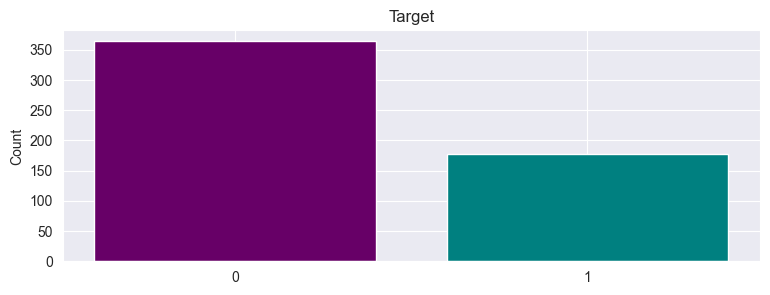

Target: 
 Target
0    364
1    177
Name: count, dtype: int64


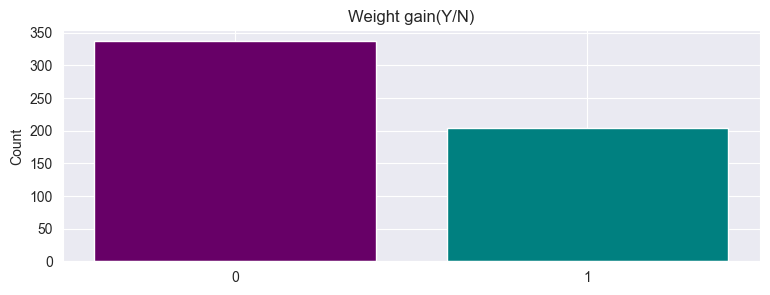

Weight gain(Y/N): 
 Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64


In [33]:
def bar_plot(variable):
      var = data[variable]
      varValue = var.value_counts()
      plt.figure(figsize = (9,3))
      plt.bar(varValue.index,varValue,color=colors)
      plt.xticks(varValue.index,varValue.index.values)
      plt.ylabel("Count")
      plt.title(variable)
      plt.show()
      print("{}: \n {}".format(variable,varValue))
category = ["Target",  "Weight gain(Y/N)"]
for c in category:
    bar_plot(c)


<Axes: xlabel='Cycle length(days)', ylabel='Density'>

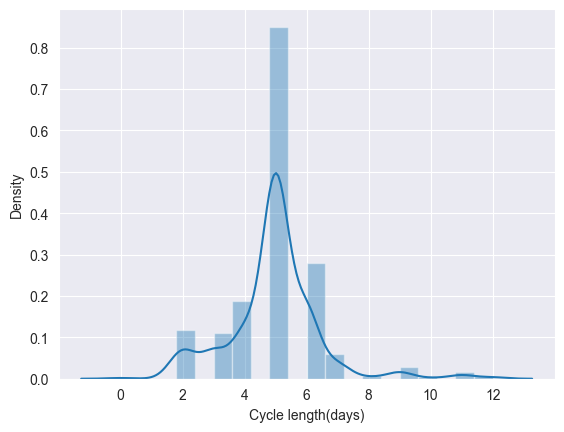

In [34]:
sns.distplot(data['Cycle length(days)'],bins=20)

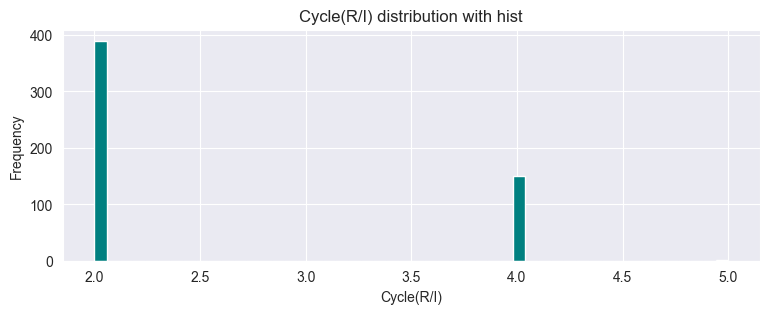

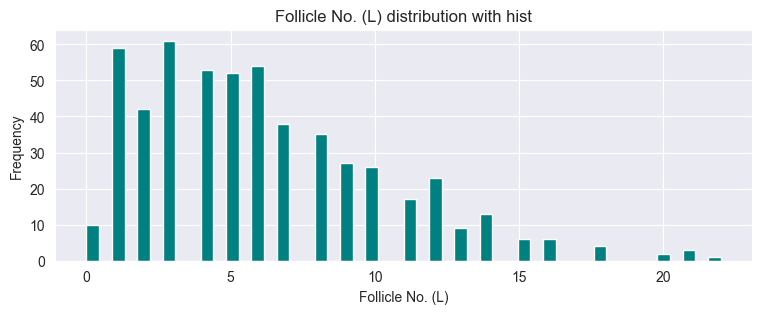

In [35]:
def plot_hist(variable):
      plt.figure(figsize = (9,3))
      plt.hist(data[variable], bins = 50,color=colors[1])
      plt.xlabel(variable)
      plt.ylabel("Frequency")
      plt.title("{} distribution with hist".format(variable))
      plt.show()
numericVar = ["Cycle(R/I)", "Follicle No. (L)"]
for n in numericVar:
    plot_hist(n)

In [36]:
data.describe()

,Target,Age (yrs),BMI,Cycle(R/I),Cycle length(days),FSH(mIU/mL),FSH/LH,AMH(ng/mL),Weight gain(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm)
count,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,24.307579,2.560074,4.94085,14.601832,6.904917,5.620634,0.377079,6.129390,6.641405,15.018115
std,0.469615,5.411006,4.055129,0.901950,1.49202,217.022081,60.691982,5.876742,0.485104,4.229294,4.436889,3.566839
min,0.000000,20.000000,12.400000,2.000000,0.00000,0.210000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,21.600000,2.000000,4.00000,3.300000,1.420000,2.010000,0.000000,3.000000,3.000000,13.000000
50%,0.000000,31.000000,24.200000,2.000000,5.00000,4.850000,2.170000,3.700000,0.000000,5.000000,6.000000,15.000000
75%,1.000000,35.000000,26.600000,4.000000,5.00000,6.410000,3.960000,6.900000,1.000000,9.000000,10.000000,18.000000
max,1.000000,48.000000,38.900000,5.000000,12.00000,5052.000000,1372.830000,66.000000,1.000000,22.000000,20.000000,24.000000


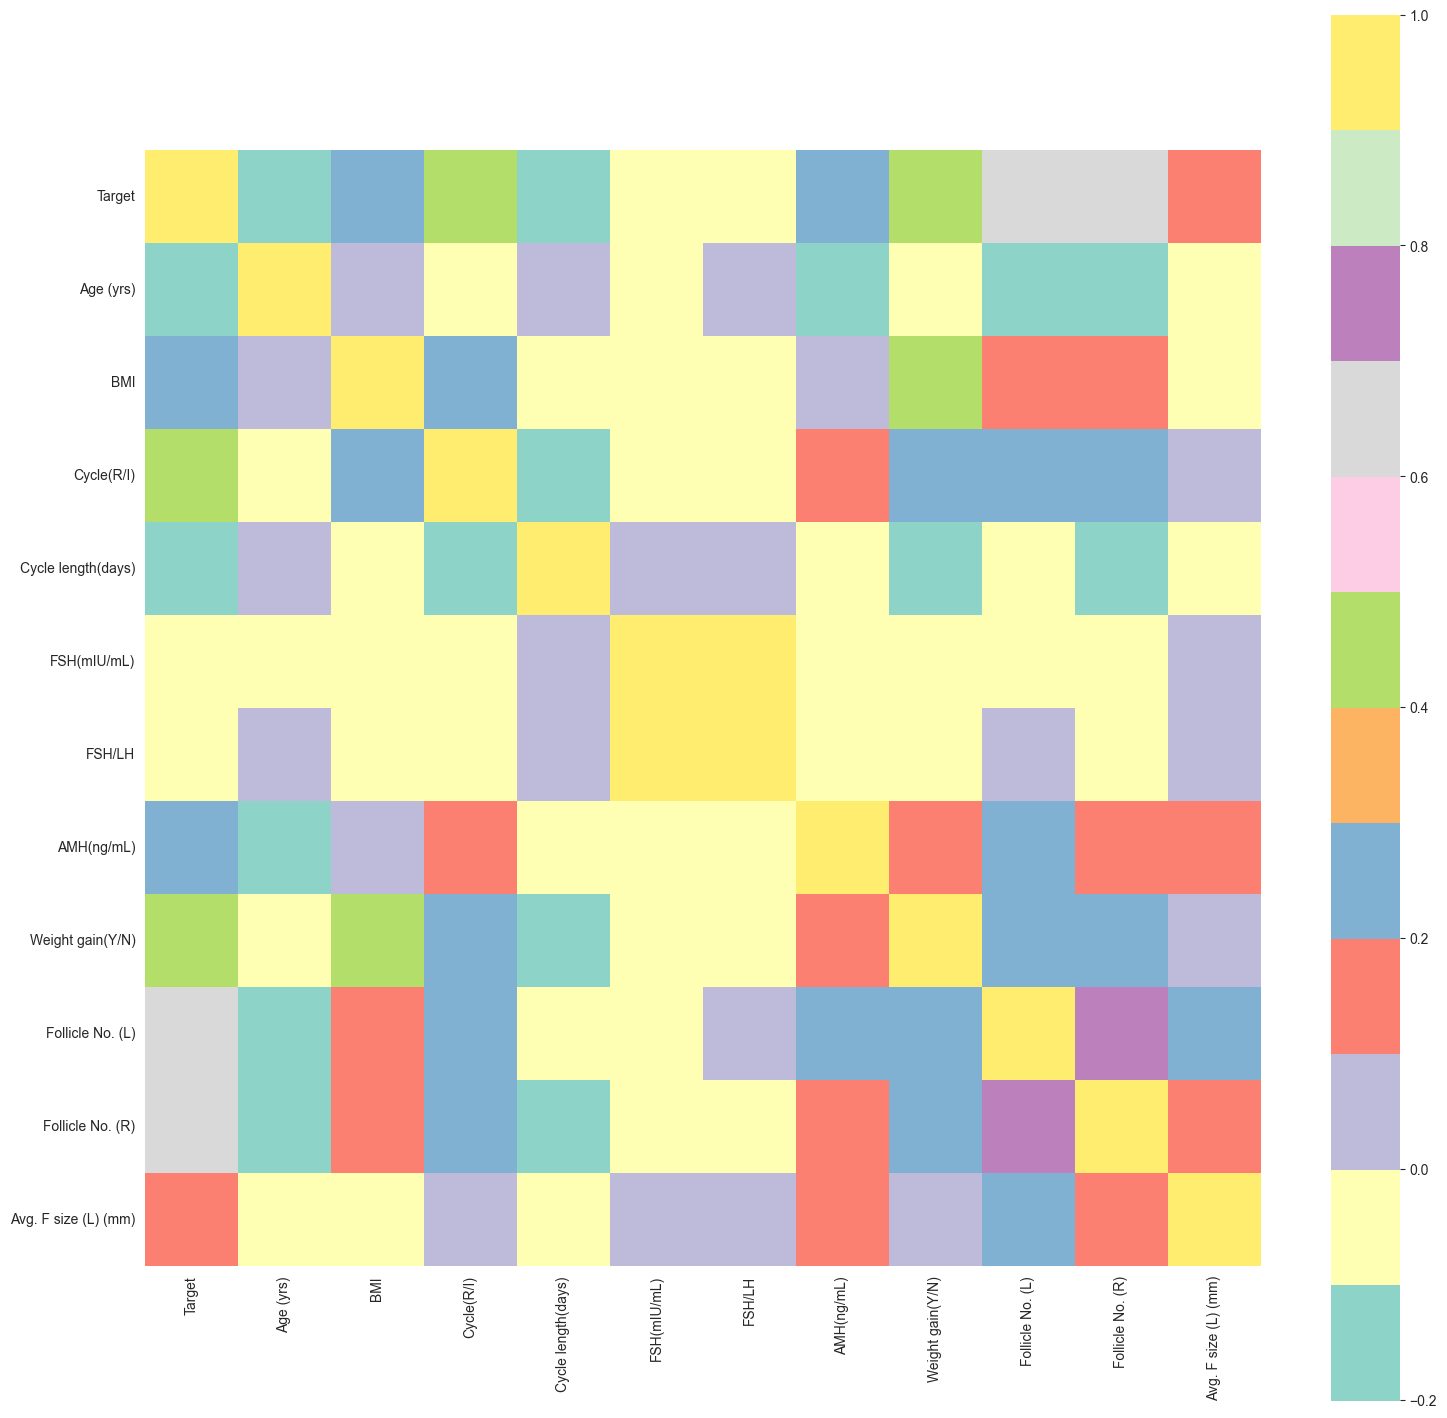

In [37]:
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Set3", square=True);

In [38]:
corrmat['Target'].sort_values(ascending=False)

Target                  1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
AMH(ng/mL)              0.264141
BMI                     0.199697
Avg. F size (L) (mm)    0.132992
FSH/LH                 -0.018334
FSH(mIU/mL)            -0.030319
Age (yrs)              -0.168513
Cycle length(days)     -0.178480
Name: Target, dtype: float64

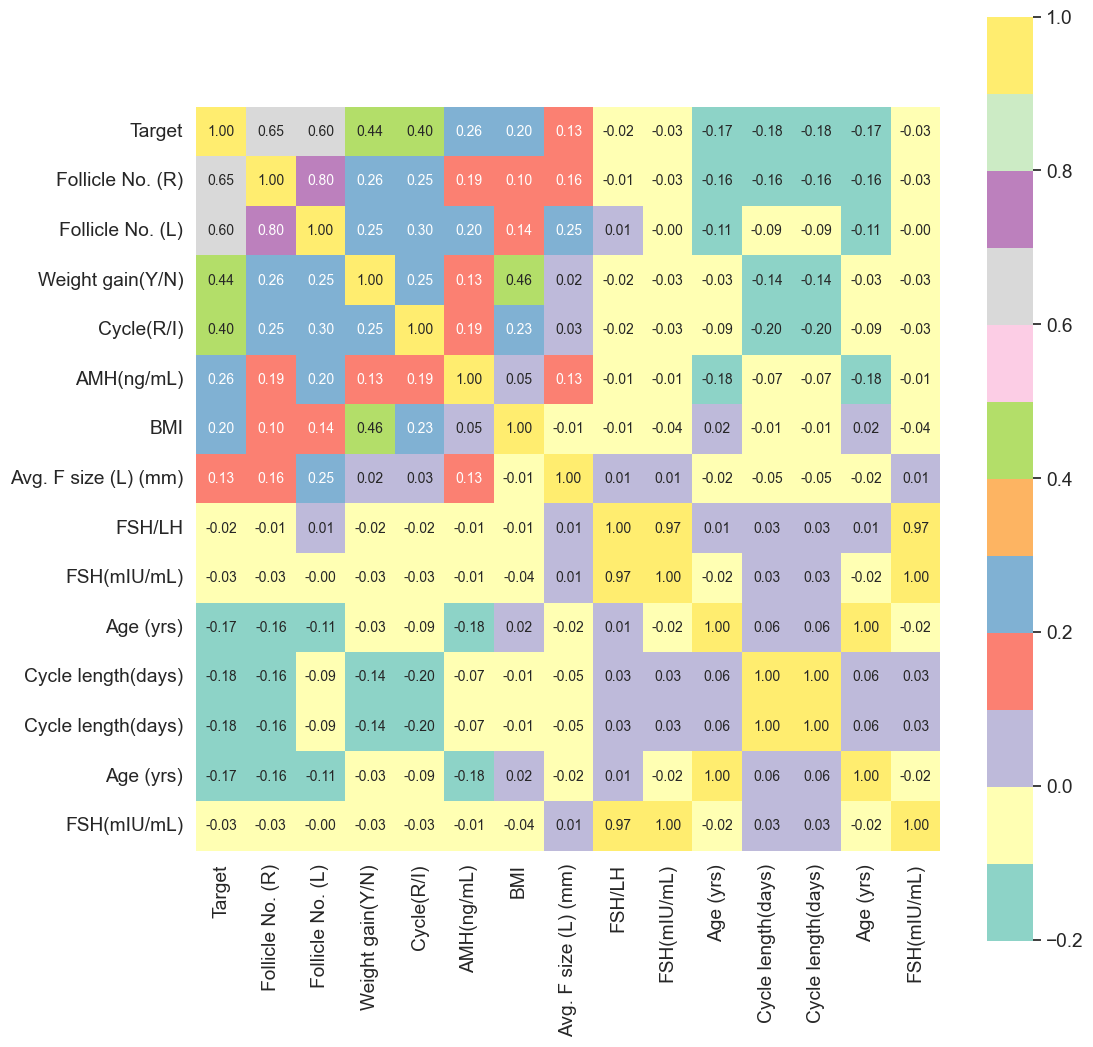

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'corrmat' is your correlation matrix and 'data' is your DataFrame

plt.figure(figsize=(12,12))
k = 12
l = 3
cols_p = corrmat.nlargest(k, 'Target')['Target'].index
cols_n = corrmat.nsmallest(l, 'Target')['Target'].index
cols = cols_p.append(cols_n)
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True,
                 cmap="Set3",
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)

plt.show()

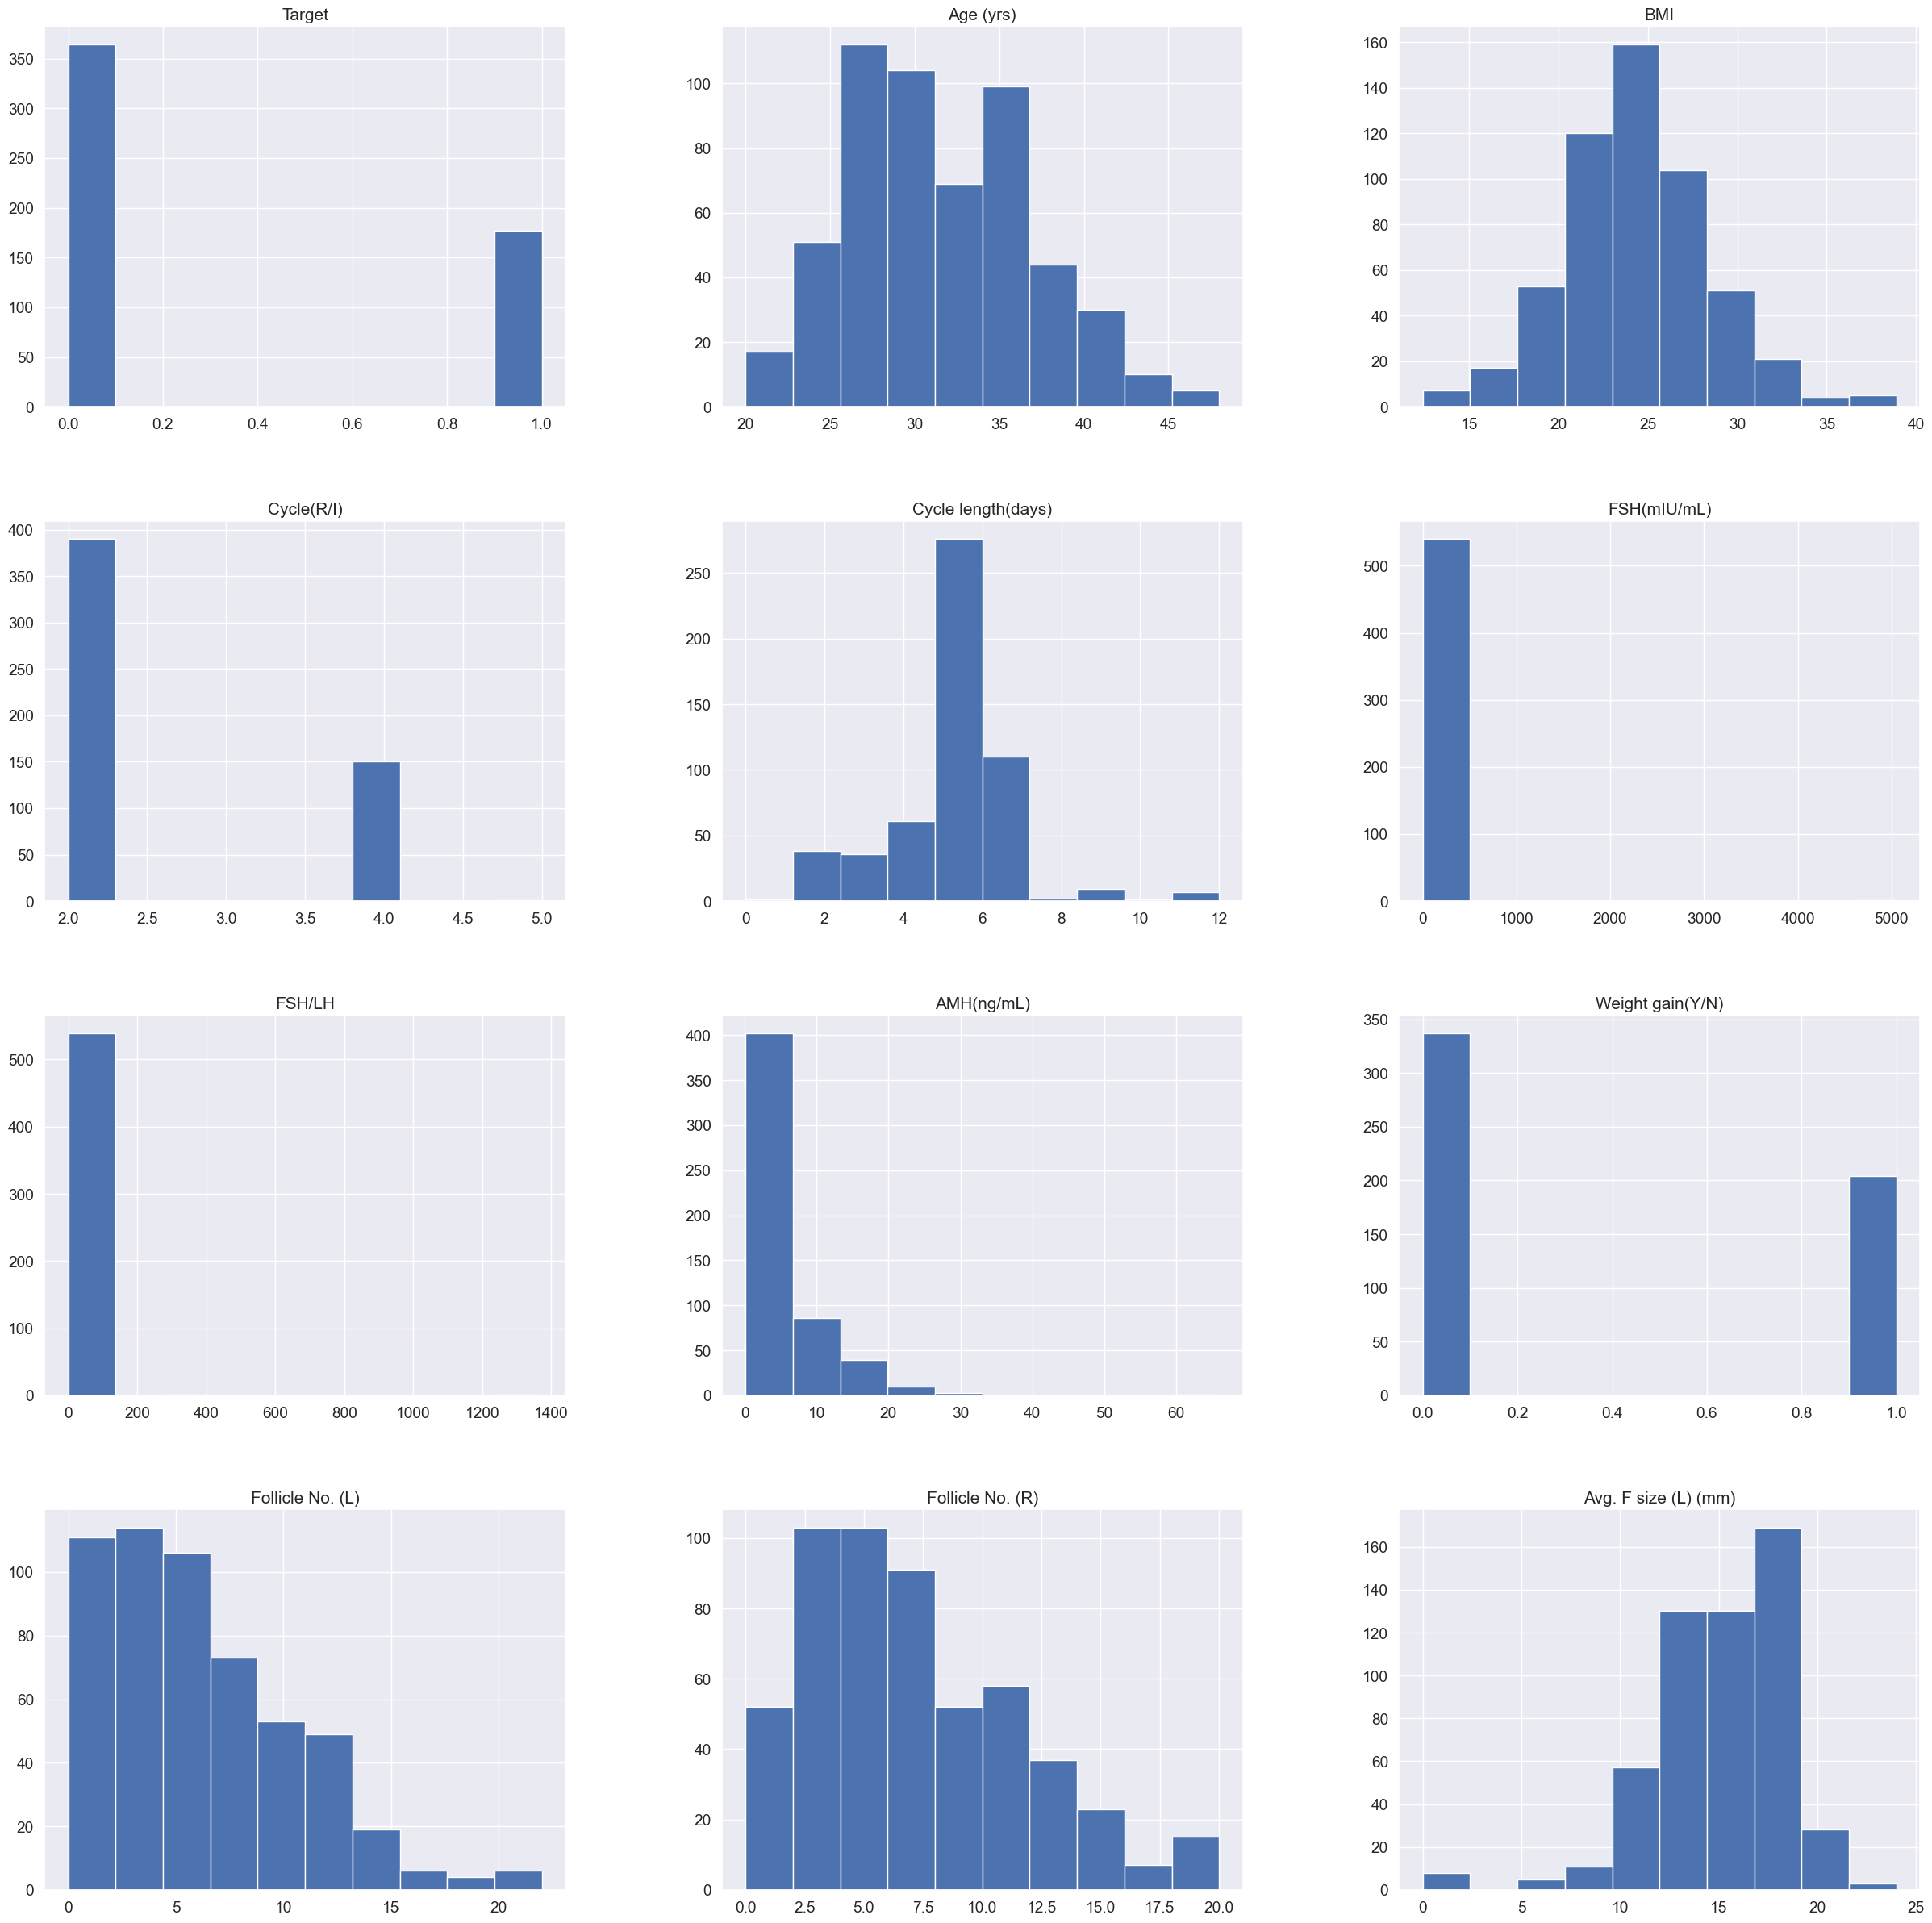

In [42]:
plt = data.hist(figsize = (30,30))

In [43]:
upper_limit = data["Age (yrs)"].mean() + 3*data["Age (yrs)"].std()
upper_limit

47.66370101703488

In [44]:
lower_limit = data["Age (yrs)"].mean() - 3*data["Age (yrs)"].std()
lower_limit

15.197666820303382

In [45]:
upper_limit = data["AMH(ng/mL)"].mean() + 3*data["AMH(ng/mL)"].std()
upper_limit

23.250860636375435

In [46]:
lower_limit = data["AMH(ng/mL)"].mean() - 3*data["AMH(ng/mL)"].std()
lower_limit

-12.00959261419429

In [47]:
data_Outlier=data[(data["Age (yrs)"]>upper_limit) | (data["Age (yrs)"]<lower_limit)]
data_Outlier

,Target,Age (yrs),BMI,Cycle(R/I),Cycle length(days),FSH(mIU/mL),FSH/LH,AMH(ng/mL),Weight gain(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm)
0,0,28,19.3,2,5,7.95,2.16,2.07,0,3,3,18.0
1,0,36,24.9,2,5,6.73,6.17,1.53,0,3,5,15.0
2,1,33,25.3,2,5,5.54,6.30,6.63,0,13,15,18.0
3,0,37,29.7,2,5,8.06,3.42,1.22,0,2,2,15.0
4,0,25,20.1,2,5,3.98,4.42,2.26,0,3,4,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
535,0,26,30.7,2,5,7.06,2.02,7.60,0,7,9,13.0
536,0,35,18.5,2,5,10.06,5.56,1.70,0,1,0,17.5
537,0,30,25.3,2,5,5.07,1.79,5.60,1,9,7,19.0
538,0,36,23.4,2,6,11.96,4.30,3.70,0,1,0,18.0


In [48]:
data.head()

,Target,Age (yrs),BMI,Cycle(R/I),Cycle length(days),FSH(mIU/mL),FSH/LH,AMH(ng/mL),Weight gain(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm)
0,0,28,19.3,2,5,7.95,2.16,2.07,0,3,3,18.0
1,0,36,24.9,2,5,6.73,6.17,1.53,0,3,5,15.0
2,1,33,25.3,2,5,5.54,6.30,6.63,0,13,15,18.0
3,0,37,29.7,2,5,8.06,3.42,1.22,0,2,2,15.0
4,0,25,20.1,2,5,3.98,4.42,2.26,0,3,4,16.0


In [49]:
X = data.drop('Target',axis=1)
y = data['Target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)
y_test

229    0
73     0
352    1
86     0
470    1
      ..
148    1
46     1
93     0
407    0
182    0
Name: Target, Length: 109, dtype: int64

In [50]:
data.head()

,Target,Age (yrs),BMI,Cycle(R/I),Cycle length(days),FSH(mIU/mL),FSH/LH,AMH(ng/mL),Weight gain(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm)
0,0,28,19.3,2,5,7.95,2.16,2.07,0,3,3,18.0
1,0,36,24.9,2,5,6.73,6.17,1.53,0,3,5,15.0
2,1,33,25.3,2,5,5.54,6.30,6.63,0,13,15,18.0
3,0,37,29.7,2,5,8.06,3.42,1.22,0,2,2,15.0
4,0,25,20.1,2,5,3.98,4.42,2.26,0,3,4,16.0


In [51]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
LogisticRegression()
y_pred1 = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8256880733944955

In [52]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
SVC()
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7064220183486238

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
DecisionTreeClassifier()
y_pred3= dt.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7798165137614679

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
RandomForestClassifier()
y_pred4= rf.predict(X_test)
accuracy_score(y_test,y_pred4)

0.8623853211009175

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
GradientBoostingClassifier()
y_pred5 = gbc.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8348623853211009

In [58]:
model_list = ['Decision Tree','SVC','RandomForest','Logistic Regression','XGBRF','CatBoostClassifier']

In [59]:
final_data = pd.DataFrame({'Models':['LR','SVM','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                 accuracy_score(y_test,y_pred2)*100,
                                 accuracy_score(y_test,y_pred3)*100,
                                 accuracy_score(y_test,y_pred4)*100,
                                 accuracy_score(y_test,y_pred5)*100,]})

In [60]:
final_data

,Models,ACC
0,LR,82.568807
1,SVM,70.642202
2,DT,77.981651
3,RF,86.238532
4,GB,83.486239


AttributeError: 'numpy.ndarray' object has no attribute 'xlabel'

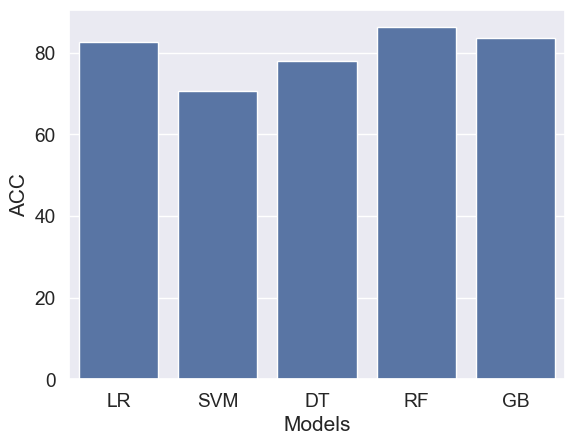

In [62]:

sns.barplot(x='Models', y='ACC', data=final_data)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [69]:
new_data = pd.DataFrame({
      'age': 36,
      'Cycle(R/I)': 2,
      'AMH(ng/mL)': 1.53,
      'Weight gain(Y/N)': 0,
      'FSH/LH':6.17,
      'BMI':24.9,
      "Follicle No. (R)":3,
      "Follicle No. (L)": 5,
      'Avg. F size (L) (mm)':15,
      "FSH(mIU/mL)":6.73,
      "Cycle length(days)":5,
}, index=[0])

new_data = new_data.rename(columns={'age': 'Age (yrs)'})

new_data


,Age (yrs),Cycle(R/I),AMH(ng/mL),Weight gain(Y/N),FSH/LH,BMI,Follicle No. (R),Follicle No. (L),Avg. F size (L) (mm),FSH(mIU/mL),Cycle length(days)
0,36,2,1.53,0,6.17,24.9,3,5,15,6.73,5


In [77]:
new_data = pd.DataFrame({
      'age': 36,
      'Cycle(R/I)': 2,
      'AMH(ng/mL)': 1.53,
      'Weight gain(Y/N)': 0,
      'FSH/LH':6.17,
      'BMI':24.9,
      "Follicle No. (R)":3,
      "Follicle No. (L)": 5,
      'Avg. F size (L) (mm)':15,
      "FSH(mIU/mL)":6.73,
      "Cycle length(days)":5,
}, index=[0])
new_data = new_data.reindex(columns=rf.feature_names_in_)
new_data

,Age (yrs),BMI,Cycle(R/I),Cycle length(days),FSH(mIU/mL),FSH/LH,AMH(ng/mL),Weight gain(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm)
0,NaN,24.9,2,5,6.73,6.17,1.53,0,5,3,15


In [72]:
p = rf.predict(new_data)
if p[0] == 0:
   print("No Disease")
else:
  print("Disease")

No Disease


In [73]:
import joblib
joblib.dump(rf,'model_joblib_pcos1')

model = joblib.load('model_joblib_pcos1')
model.predict(new_data)

data.tail()

,Target,Age (yrs),BMI,Cycle(R/I),Cycle length(days),FSH(mIU/mL),FSH/LH,AMH(ng/mL),Weight gain(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm)
536,0,35,18.5,2,5,10.06,5.56,1.7,0,1,0,17.5
537,0,30,25.3,2,5,5.07,1.79,5.6,1,9,7,19.0
538,0,36,23.4,2,6,11.96,4.30,3.7,0,1,0,18.0
539,0,27,22.2,4,2,4.40,1.02,5.2,0,7,6,18.0
540,1,23,30.1,4,7,3.99,0.93,20.0,1,9,10,19.0


In [76]:
import joblib

def show_entry_fields():
    try:
        p1 = int(input("Enter Your Age: "))
        p2 = int(input("Enter your BMI Value: "))
        p3 = int(input("Enter your Cycle length: "))
        p4 = int(input("Enter Value of Cycle (R/I): "))
        p5 = int(input("Enter Value of AMH (ng/mL): "))
        p6 = int(input("Enter Value of FSH/LH: "))
        p7 = int(input("Enter Value of FSH (mIU/mL): "))
        p8 = int(input("Enter Value of Weight gain (Y/N): "))
        p9 = int(input("Enter Value of Follicle No. (L): "))
        p10 = int(input("Enter Value of Follicle No. (R): "))
        p11 = int(input("Enter Value of Avg. F size (L) (mm): "))

        model = joblib.load('model_joblib_pcos1')
        if model is None:
            print("Error loading model")
        else:
            result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11]])
            if result[0] == 0:
                print("No PCOS")
            else:
                print("Possibility of PCOS")
    except ValueError:
        print("Please enter valid integer values")


show_entry_fields()

Enter Your Age:  35
Enter your BMI Value:  19
Enter your Cycle length:  5
Enter Value of Cycle (R/I):  6
Enter Value of AMH (ng/mL):  13
Enter Value of FSH/LH:  10
Enter Value of FSH (mIU/mL):  4
Enter Value of Weight gain (Y/N):  1
Enter Value of Follicle No. (L):  7
Enter Value of Follicle No. (R):  0
Enter Value of Avg. F size (L) (mm):  18


No PCOS
